In [35]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from sklearn.decomposition import NMF
import soundfile as sf
import IPython.display as ipd

In [36]:
def divergence(V,W,H):
    return np.sum(V * np.log((V) / (W @ H)) - V + W @ H)


def NMF(V, S, threshold = 0.05, MAXITER = 5000): 

    counter = 0
    cost_function = []
    beta_divergence = 1
    
    K, N = np.shape(V)
    
    W = np.abs(np.random.normal(loc = 0, scale = 2.5, size = (K, S)))    
    H = np.abs(np.random.normal(loc = 0, scale = 2.5, size = (S, N)))

    while beta_divergence >= threshold and counter <= MAXITER:
        
        H *= (W.T @ V) / (W.T @ (W @ H))
        H[H < 0] = 0
        W *= (V @ H.T) / ((W @ H) @ H.T)
        W[W < 0] = 0
        
        beta_divergence =  divergence(V, W, H)
        cost_function.append(beta_divergence)
        counter += 1

    return W, H


In [37]:
FRAME1 = 1024
HOP = 512

In [38]:
audio_file = "../data/sounds_mixedY.wav"
y, sr = librosa.load(audio_file)
D = librosa.stft(y, n_fft=FRAME1, hop_length=HOP)
magnitude = np.abs(D) 
ipd.Audio(y, rate = sr)

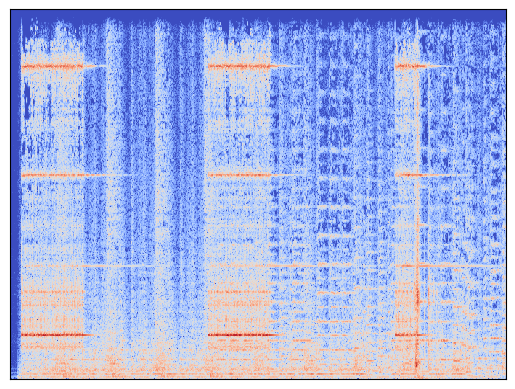

In [39]:
librosa.display.specshow(librosa.amplitude_to_db(magnitude), sr=sr, n_fft=FRAME1, hop_length=HOP)

In [40]:
W, H = NMF(magnitude, 2)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20812\1139481396.py:2: RuntimeWarning: overflow encountered in divide
  return np.sum(V * np.log((V) / (W @ H)) - V + W @ H)


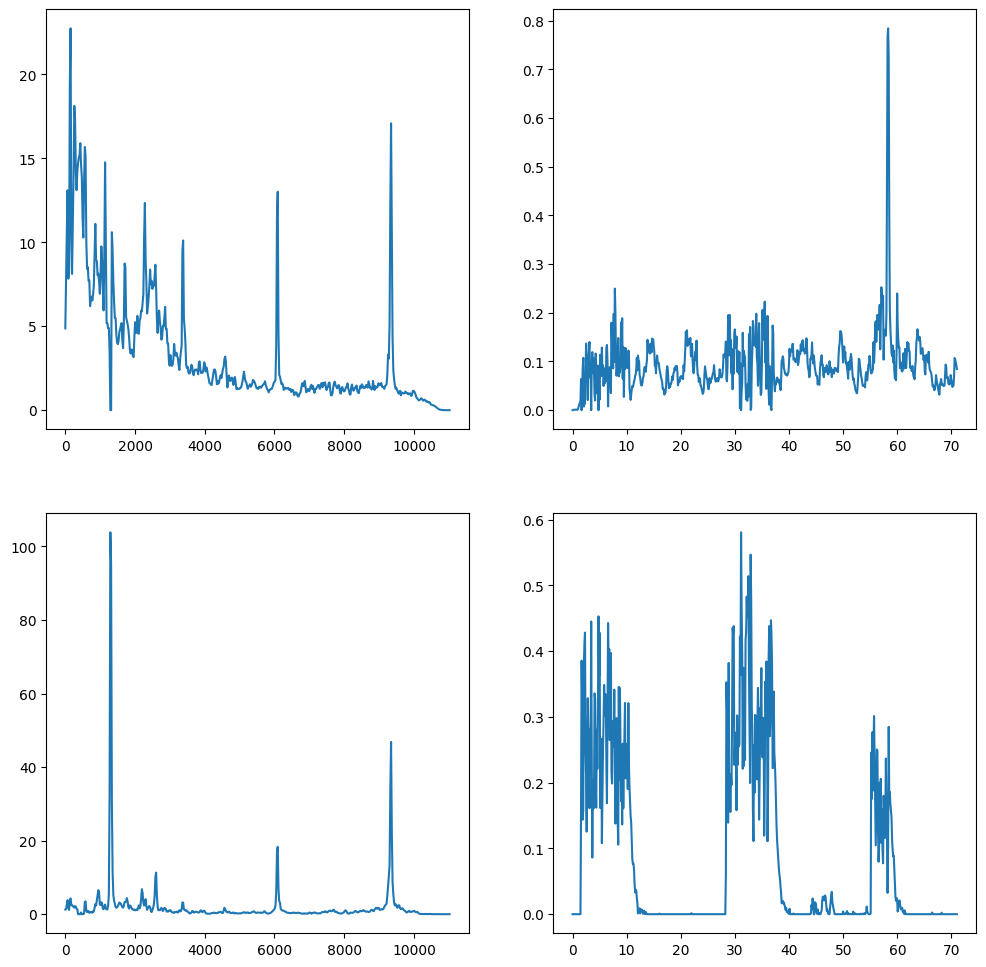

In [41]:
dims = np.shape(magnitude)
rows = dims[0]
cols = dims[1]
f, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].set_title = "W"
axs[0,1].set_title = "H"
for row in range(2):
    axs[row,0].plot(np.linspace(0, 11025,rows),W[:,row])
    axs[row,1].plot(np.linspace(0, 71,cols),H[row])

In [44]:
sound_stft_A = np.angle(D)
filters = [1]
filtered = W[:,filters]@H[filters,:]
reconst = filtered * np.exp(1j*sound_stft_A)
new_sound = librosa.istft(reconst, n_fft=FRAME1, hop_length=HOP)

In [45]:
ipd.Audio(new_sound, rate=sr)